<a href="https://colab.research.google.com/github/Rafsan7238/CSE422_Lab/blob/main/CSE422_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSE422 Lab Assignment 6**
# **Sklearn Library**

## **Necessary Imports**

In [49]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## **Mount Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load Dataset as Dataframe**

In [4]:
breast_cancer_data = pd.read_csv('/content/drive/MyDrive/CSE422/breast cancer classification dataset.csv')
breast_cancer_data = pd.DataFrame(breast_cancer_data)
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,NaN,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,NaN,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## **Data Pre-Processing**

### **Handling Missing Value**

In [5]:
breast_cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  9
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      8
Unnamed:

In [6]:
breast_cancer_data = breast_cancer_data.drop(['id','Unnamed: 32'], axis=1)
breast_cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
breast_cancer_data['radius_mean'] = impute.fit_transform(breast_cancer_data[['radius_mean']])
breast_cancer_data['fractal_dimension_worst'] = impute.fit_transform(breast_cancer_data[['fractal_dimension_worst']])

breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### **Encode Categorical Features**

In [8]:
breast_cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = encoder.fit_transform(breast_cancer_data['diagnosis'])
breast_cancer_data['diagnosis'].unique()

array([1, 0])

### **0-1 Data Normalisation**

In [10]:
normaliser = MinMaxScaler()
breast_cancer_data = pd.DataFrame(normaliser.fit_transform(breast_cancer_data), columns=breast_cancer_data.columns)
breast_cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.336528,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.190078
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.190078
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### **Split Dataset**

In [11]:
features = breast_cancer_data.iloc[:, 1:]
labels = breast_cancer_data.iloc[:, 0]

print(features, labels, sep="\n\n")

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0       0.336528      0.022658  ...        0.598462                 0.418864
1       0.643144      0.272574  ...        0.233590                 0.190078
2       0.601496      0.390260  ...        0.403706                 0.213433
3       0.210090      0.360839  ...        1.000000                 0.773711
4       0.629893      0.156578  ...        0.157500                 0.142595
..           ...           ...  ...             ...                      ...
564     0.690000      0.428813  ...        0.097575                 0.105667
565     0.622320      0.626987  ...        0.198502                 0.190078
566     0.455251      0.621238  ...        0.128721                 0.151909
567     0.644564      0.663510  ...        0.497142                 0.452315
568     0.036869      0.501522  ...        0.257441                 0.100682

[569 rows x 30 columns]

0      1.0
1      1.0
2      1.0
3      1.0
4     

In [12]:
x_train, x_test, y_train, y_test = train_test_split(np.array(features), np.array(labels, dtype=int), test_size=0.2, shuffle=True, random_state=1)

## **Pre-PCA Classification**

### **SVM**

In [44]:
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)
svc_predictions = svc_model.predict(x_test)
svc_acc = accuracy_score(y_test, svc_predictions)

print(svc_acc)

0.9736842105263158


### **MLP Classifier**

In [45]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10), activation='relu', max_iter=10000)
mlp_model.fit(x_train, y_train)
mlp_predictions = mlp_model.predict(x_test)
mlp_acc = accuracy_score(y_test, mlp_predictions)

print(mlp_acc)

0.9824561403508771


### **Random Forest**

In [48]:
forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy')
forest_model.fit(x_train, y_train)
forest_predictions = forest_model.predict(x_test)
forest_acc = accuracy_score(y_test, forest_predictions)

print(forest_acc)

0.956140350877193


## **Post-PCA Classification**

### **Dimensionality Reduction**

In [55]:
pca = PCA(n_components=15)
cols = ["PC" + str(i) for i in range(1,16)]

features_PCA = pd.DataFrame(data=pca.fit_transform(features), columns=cols)
labels_PCA = labels

features_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.346044,0.468891,-0.531958,0.043508,-0.071190,0.186829,0.232984,-0.030708,0.023106,0.219424,0.106161,0.054792,-0.052050,-0.152686,-0.189927
1,0.456874,-0.567597,-0.206751,-0.035176,0.011787,0.017973,0.032010,0.019417,-0.055989,-0.099065,0.075666,-0.131553,0.155850,-0.052286,0.049750
2,0.954461,-0.113807,-0.148828,-0.000178,-0.033460,0.069025,-0.108428,0.006249,-0.047934,-0.080979,0.038300,0.060993,0.013640,-0.020794,0.041441
3,1.006906,1.520299,-0.053239,-0.210204,-0.218811,0.388890,0.194399,0.144368,0.190155,-0.101869,0.134966,0.211822,0.131577,-0.026505,0.022916
4,0.625296,-0.304598,-0.409514,0.240656,-0.002603,-0.156654,-0.063291,0.044947,0.007768,-0.010727,-0.126485,-0.074890,0.030311,-0.058417,0.047546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.001355,-0.478769,-0.100796,0.274884,-0.084404,-0.308811,-0.130117,0.004572,-0.119833,0.067813,-0.040531,0.031319,0.037321,-0.035148,0.077850
565,0.630150,-0.490337,0.402840,0.162439,-0.078780,-0.050323,-0.043219,-0.111238,0.040561,0.016776,0.057993,-0.046725,0.063777,0.023253,0.071410
566,0.225695,-0.289637,0.314793,-0.011467,0.218205,-0.080310,-0.030697,0.015428,-0.095571,-0.092223,-0.013856,0.057253,-0.040626,0.029908,0.032663
567,1.679629,0.328407,0.294766,-0.156680,0.070378,0.109101,0.069016,-0.092438,0.085691,0.010873,-0.132869,-0.010266,-0.152368,-0.015327,0.010276


### **Split Dataset**

In [60]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(np.array(features_PCA), np.array(labels_PCA, dtype=int), test_size=0.2, shuffle=True, random_state=1)

### **SVM_PCA**

In [62]:
svc_model_pca = SVC(kernel='linear')
svc_model_pca.fit(x_train_pca, y_train_pca)
svc_pca_predictions = svc_model_pca.predict(x_test_pca)
svc_pca_acc = accuracy_score(y_test_pca, svc_pca_predictions)

print(svc_pca_acc)

0.9736842105263158


### **MLP Clasiifier PCA**

In [63]:
mlp_model_pca = MLPClassifier(hidden_layer_sizes=(10), activation='relu', max_iter=10000)
mlp_model_pca.fit(x_train_pca, y_train_pca)
mlp_pca_predictions = mlp_model_pca.predict(x_test_pca)
mlp_pca_acc = accuracy_score(y_test_pca, mlp_pca_predictions)

print(mlp_pca_acc)

0.9649122807017544


### **Random Forest PCA**

In [65]:
forest_model_pca = RandomForestClassifier(n_estimators=50, criterion='entropy')
forest_model_pca.fit(x_train_pca, y_train_pca)
forest_pca_predictions = forest_model_pca.predict(x_test_pca)
forest_pca_acc = accuracy_score(y_test_pca, forest_pca_predictions)

print(forest_pca_acc)

0.9385964912280702


## **Accuracy Comparison**

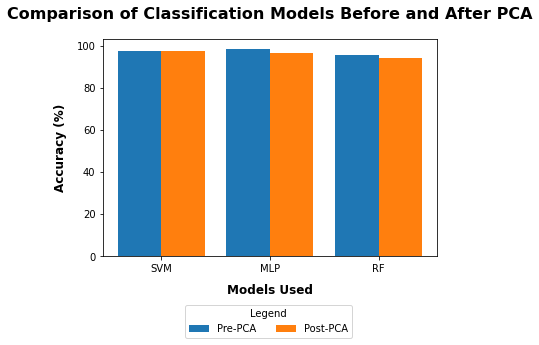

In [104]:
X_labels = ['SVM', 'MLP', 'RF']
pre_pca_acc = np.array([svc_acc, mlp_acc, forest_acc]) * 100
post_pca_acc = np.array([svc_pca_acc, mlp_pca_acc, forest_pca_acc]) * 100
  
X_axis = np.arange(len(X_labels))
  
plt.bar(X_axis - 0.2, pre_pca_acc, 0.4, label = 'Pre-PCA')
plt.bar(X_axis + 0.2, post_pca_acc, 0.4, label = 'Post-PCA')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Models Used", weight='bold', size=12, labelpad=10)
plt.ylabel("Accuracy (%)", weight='bold', size=12, labelpad=10)
plt.title("Comparison of Classification Models Before and After PCA", weight='bold', size=16, pad=20)
plt.legend(title='Legend', bbox_to_anchor=(0.76,-0.2), ncol=2)
plt.show()